In [2]:
## build researcher events, student events, and self-study events
## researcher are simply those with NH citations

In [3]:
import sys

import pandas as pd
import numpy as np
import time
import datetime
import os
from nanoHUB.application import Application
from nanoHUB.configuration import ClusteringConfiguration
from nanoHUB.pipeline.geddes.data import get_default_s3_client
from nanoHUB.dataaccess.lake import S3FileMapper

from nanoHUB.clustering.infra import get_mike_only_clustered_users, get_xufeng_only_clustered_users, get_mike_xufeng_clustered_users
from nanoHUB.clustering.infra import create_clusters_repository, add_cluster_info, get_all_clustered_users, get_all_self_study_users, get_all_self_identified_users

nanoHUB - Serving Students, Researchers & Instructors


In [4]:
pd.set_option('display.max_columns', None)
cwd = os.getcwd()

In [5]:
## determine starting year
#if cache_flag == False:
start_year_base = 1999 #2000
#start_year_base = 2019 #2000
pathsave=cwd+'/cached_data/'
pathsave=cwd+'/test_data/'
pathsave=cwd+'/AnnualReport2022_data/'
pathsave=cwd+'/total_data_safe/2020_'
pathsave=cwd+'/total_data/'
pathsave=cwd+'/AnnualReport2022_totalcount_data/'



In [6]:
application = Application.get_instance()
nanohub_db = application.new_db_engine('nanohub')
nanohub_metrics_db = application.new_db_engine('nanohub_metrics')
wang159_myrmekes_db = application.new_db_engine('rfm_data')

s3_client = get_default_s3_client(application)
derived_data_file_path = 'derived_data_for_users.csv'
processed_mapper = S3FileMapper(s3_client, ClusteringConfiguration().bucket_name_processed)

## Cumulative classroom/research/self-study

In [7]:
today = datetime.datetime.today()
print(today)

2022-05-27 10:47:48.569689


In [8]:
## determine starting year
#if cache_flag == False:
start_year_base = 1999 #2000
#else:
#     print('check the saved file')
#    start_year_base = int(user_breakdown_df['year_month'].to_list()[-1][:4])
    
    

In [9]:
from copy import deepcopy

In [10]:
cache_flag = False
all_months_list = list()
for this_year in range(start_year_base+1,today.year+2):
    if cache_flag == True:
        for this_month in range(1,today.month+1):
            all_months_list.append(datetime.datetime(this_year, this_month, 1))
    else:
        for this_month in range(1,12+1):
            all_months_list.append(datetime.datetime(this_year, this_month, 1))

cache_all_month_list = pd.DataFrame()
cache_all_month_list['Date'] = all_months_list
cache_all_month_list.to_csv(cwd+'/cached_data/all_months_list.csv')
cache_all_month_list.to_csv(cwd+'/cached_data/'+ str(start_year_base)+'_all_months_list.csv')
cache_all_month_list = []
print('allmonths partial list',all_months_list[0:36])


allmonths partial list [datetime.datetime(2000, 1, 1, 0, 0), datetime.datetime(2000, 2, 1, 0, 0), datetime.datetime(2000, 3, 1, 0, 0), datetime.datetime(2000, 4, 1, 0, 0), datetime.datetime(2000, 5, 1, 0, 0), datetime.datetime(2000, 6, 1, 0, 0), datetime.datetime(2000, 7, 1, 0, 0), datetime.datetime(2000, 8, 1, 0, 0), datetime.datetime(2000, 9, 1, 0, 0), datetime.datetime(2000, 10, 1, 0, 0), datetime.datetime(2000, 11, 1, 0, 0), datetime.datetime(2000, 12, 1, 0, 0), datetime.datetime(2001, 1, 1, 0, 0), datetime.datetime(2001, 2, 1, 0, 0), datetime.datetime(2001, 3, 1, 0, 0), datetime.datetime(2001, 4, 1, 0, 0), datetime.datetime(2001, 5, 1, 0, 0), datetime.datetime(2001, 6, 1, 0, 0), datetime.datetime(2001, 7, 1, 0, 0), datetime.datetime(2001, 8, 1, 0, 0), datetime.datetime(2001, 9, 1, 0, 0), datetime.datetime(2001, 10, 1, 0, 0), datetime.datetime(2001, 11, 1, 0, 0), datetime.datetime(2001, 12, 1, 0, 0), datetime.datetime(2002, 1, 1, 0, 0), datetime.datetime(2002, 2, 1, 0, 0), datetime

In [11]:
clustered_track = []
clustered_m_track = []
clustered_x_track = []
clustered_mx_track = []
self2_track = []
researcher_track = []
simtotal_track = []
self_identified_track = []

clustered_track_per = []
self_track_per = []
researcher_track_per = []

self_identified_track_df = pd.read_csv(pathsave+'selfidentifiedauthors_track.csv',usecols=['track'])
self_identified_track = self_identified_track_df['track'].tolist()
#print('self_identified_track[0:30]',self_identified_track[0:30])
print('len(self_identified_track)',len(self_identified_track))

researcher_track_df = pd.read_csv(pathsave+'citingauthor_track.csv',usecols=['track'])
researcher_track = researcher_track_df['track'].tolist()
#print('researcher_track[0:30]',researcher_track[0:30])
print('len(researcher_track)',len(researcher_track))

self2_track_df = pd.read_csv(pathsave+'unclassified_track.csv',usecols=['track'])
self2_track = self2_track_df['track'].tolist()
#print('self2_track[0:30]',self2_track[0:30])
print('len(self2_track)',len(self2_track))

simtotal_track_df = pd.read_csv(pathsave+'simtotal_date_track_stitch.csv',usecols=['track'])
simtotal_track = simtotal_track_df['track'].tolist()
#print('simtotal_track[0:30]',simtotal_track[0:30])
print('len(simtotal_track)',len(simtotal_track))

clustered_track_df = pd.read_csv(pathsave+'clustered_all_track.csv',usecols=['track'])
clustered_track = clustered_track_df['track'].tolist()
#print('clustered_track[0:30]',clustered_track[0:30])
print('len(clustered_track)',len(clustered_track))

clustered_m_track_df = pd.read_csv(pathsave+'clustered_m_track.csv',usecols=['track'])
clustered_m_track = clustered_m_track_df['track'].tolist()
#print('clustered_m_track[0:30]',clustered_m_track[0:30])
print('len(clustered_m_track)',len(clustered_m_track))

clustered_x_track_df = pd.read_csv(pathsave+'clustered_x_track.csv',usecols=['track'])
clustered_x_track = clustered_x_track_df['track'].tolist()
#print('clustered_x_track[0:30]',clustered_x_track[0:30])
print('len(clustered_x_track)',len(clustered_x_track))

clustered_mx_track_df = pd.read_csv(pathsave+'clustered_mx_track.csv',usecols=['track'])
clustered_mx_track = clustered_mx_track_df['track'].tolist()
print('clustered_mx_track[0:30]',clustered_mx_track[0:30])
print('len(clustered_mx_track)',len(clustered_mx_track))





len(self_identified_track) 288
len(researcher_track) 288
len(self2_track) 288
len(simtotal_track) 277
len(clustered_track) 288
len(clustered_m_track) 288
len(clustered_x_track) 288
clustered_mx_track[0:30] [0, 0, 3, 4, 7, 7, 7, 7, 8, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13]
len(clustered_mx_track) 288


In [12]:
#just for testing until all data is assembled, let's trim the lists to a smaller value 
if (1):
    listlength=277
    self_identified_track=self_identified_track[:listlength]
    researcher_track=researcher_track[:listlength]
    self2_track=self2_track[:listlength]
    simtotal_track=simtotal_track[:listlength]
    clustered_track=clustered_track[:listlength]
    clustered_m_track=clustered_m_track[:listlength]
    clustered_x_track=clustered_x_track[:listlength]
    clustered_mx_track=clustered_mx_track[:listlength]
    all_months_list=all_months_list[:listlength]

    print('simtotal_track ',simtotal_track[0:100])

simtotal_track  ['0', '0', '58', '72', '88', '96', '101', '119', '215', '269', '327', '378', '409', '616', '759', '789', '833', '848', '859', '866', '887', '920', '951', '986', '997', '1027', '1078', '1090', '1106', '1130', '1149', '1166', '1207', '1259', '1289', '1305', '1326', '1359', '1733', '1767', '1807', '1853', '1880', '1901', '2032', '2085', '2123', '2156', '2170', '2199', '2266', '2364', '2442', '2469', '2546', '2573', '2738', '2797', '2867', '2911', '2962', '3062', '3168', '3240', '3307', '3347', '3440', '3550', '3701', '3833', '4046', '4236', '4370', '4639', '4963', '5280', '5529', '5734', '6068', '6273', '6677', '6954', '7617', '8024', '8237', '8998', '9532', '10022', '10384', '10690', '10976', '11245', '11568', '11956', '12511', '12898', '13132', '13861', '14518', '14918']


In [13]:
user_breakdown_df2 = pd.DataFrame()
user_breakdown_df2['year_month'] = all_months_list
user_breakdown_df2['simtotal_track'] = simtotal_track
user_breakdown_df2['clustered_track'] = clustered_track
user_breakdown_df2['clustered_m_track'] = clustered_m_track
user_breakdown_df2['clustered_x_track'] = clustered_x_track
user_breakdown_df2['clustered_mx_track'] = clustered_mx_track
user_breakdown_df2['self_identified_track'] = self_identified_track
user_breakdown_df2['self_track'] = self2_track
user_breakdown_df2['researcher_track'] = researcher_track
display(user_breakdown_df2.tail(5))

display(user_breakdown_df2[263:268])

timeslot=265

print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['simtotal_track'][timeslot] = ", user_breakdown_df2['simtotal_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_track'][timeslot] = ", user_breakdown_df2['clustered_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_track'][timeslot] = ", user_breakdown_df2['self_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['researcher_track'][timeslot] = ", user_breakdown_df2['researcher_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_identified_track'][timeslot] = ", user_breakdown_df2['self_identified_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "all researchers = ", user_breakdown_df2['researcher_track'][timeslot]+ user_breakdown_df2['self_identified_track'][timeslot])



,year_month,simtotal_track,clustered_track,clustered_m_track,clustered_x_track,clustered_mx_track,self_identified_track,self_track,researcher_track
272,2022-09-01,163954,79561,17025,15298,47238,1721,81981,2177
273,2022-10-01,163954,79561,17025,15298,47238,1721,81981,2177
274,2022-11-01,163954,79561,17025,15298,47238,1721,81981,2177
275,2022-12-01,163954,79561,17025,15298,47238,1721,81981,2177
276,2023-01-01,163954,79561,17025,15298,47238,1721,81981,2177


,year_month,simtotal_track,clustered_track,clustered_m_track,clustered_x_track,clustered_mx_track,self_identified_track,self_track,researcher_track
263,2021-12-01,158850,78987,16817,15250,46920,1620,79400,2166
264,2022-01-01,160695,79561,17025,15298,47238,1652,79872,2170
265,2022-02-01,161769,79561,17025,15298,47238,1693,81391,2175
266,2022-03-01,163334,79561,17025,15298,47238,1721,81981,2177
267,2022-04-01,163954,79561,17025,15298,47238,1721,81981,2177


date  2022-02-01 00:00:00 user_breakdown_df2['simtotal_track'][timeslot] =  161769
date  2022-02-01 00:00:00 user_breakdown_df2['clustered_track'][timeslot] =  79561
date  2022-02-01 00:00:00 user_breakdown_df2['self_track'][timeslot] =  81391
date  2022-02-01 00:00:00 user_breakdown_df2['researcher_track'][timeslot] =  2175
date  2022-02-01 00:00:00 user_breakdown_df2['self_identified_track'][timeslot] =  1693
date  2022-02-01 00:00:00 all researchers =  3868


In [14]:
# user_breakdown_df.to_csv(cwd+'/cached_data/temp.csv')

In [15]:
import re

In [16]:
## read the dev_flags.txt to determine where to save
with open(cwd+'/dev_flags.txt','r') as f:
    raw_flags = f.read()
flag_pattern = re.compile(r'= \w+')
flags1 = re.findall(flag_pattern,raw_flags)    
flags_result = [i[2:] for i in flags1]
dev_flag = flags_result[0]
prod_flag = flags_result[1]

[WARNING] [warnings - py.warnings]: /var/folders/vj/8y6lx9hn3_l243f644z985jr0000gn/T/ipykernel_39994/817852022.py:23: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis="x", nbins=40)
 [warnings._showwarnmsg:109]
[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


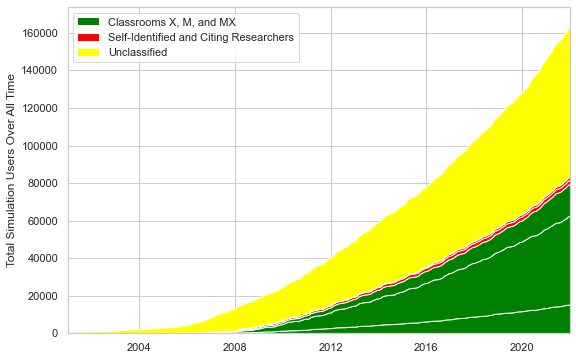

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set_style("whitegrid")

end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2001,1,1)

plt.figure(figsize=(9,6))
# user_breakdown_df2 = user_breakdown_df.iloc[:-(12-today.month),:]
#user_breakdown_df2 = user_breakdown_df.iloc[:-12-(12-today.month),:]
plt.stackplot(user_breakdown_df2.year_month, \
#               user_breakdown_df2[['clustered_track','self_track']].to_numpy().T, \
#              labels=['Classroom', 'Unclassified'], \
#              colors=['green', 'orange']); #Self-study              
              user_breakdown_df2[['clustered_x_track', 'clustered_mx_track', 'clustered_m_track', 'researcher_track','self_identified_track','self_track']].to_numpy().T, \
             labels=['Classrooms X, M, and MX', '', '', 'Self-Identified and Citing Researchers', '', 'Unclassified'], \
             colors=['green','green', 'green','red', 'red','yellow']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('Total Simulation Users Over All Time')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_total_GK.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_total_GK.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_total_12months_GK.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_total_GK.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_total_GK.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_total_GK.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

In [18]:
total = user_breakdown_df2['clustered_track'].to_numpy()+\
        user_breakdown_df2['self_track'].to_numpy() +\
        user_breakdown_df2['researcher_track'].to_numpy()+\
        user_breakdown_df2['self_identified_track'].to_numpy() 

#print('total ',total)

total_research = user_breakdown_df2['researcher_track'].to_numpy()+\
                 user_breakdown_df2['self_identified_track'].to_numpy() 

#print('total_research ',total_research)
user_breakdown_df2['all_researchers'] = np.add(user_breakdown_df2['self_identified_track'], user_breakdown_df2['researcher_track'])
#user_breakdown_df2['all_researchers'] = user_breakdown_df2[['researcher_track','self_identified_track']].sum
display(user_breakdown_df2['all_researchers'].tolist()[200:205])
display(user_breakdown_df2['researcher_track'].tolist()[200:205])
display(user_breakdown_df2['self_identified_track'].tolist()[200:205])

user_breakdown_df2['clustered_track_per'] = 100*np.divide(user_breakdown_df2['clustered_track'],total)
user_breakdown_df2['self_identified_track_per'] = 100*np.divide(user_breakdown_df2['self_identified_track'], total)
user_breakdown_df2['researcher_track_per'] = 100*np.divide(user_breakdown_df2['researcher_track'], total)
user_breakdown_df2['self_track_per'] = 100*np.divide(user_breakdown_df2['self_track'], total)
user_breakdown_df2['all_researchers_per'] = 100*np.divide(user_breakdown_df2['all_researchers'], total)

[2697, 2741, 2789, 2806, 2822]

[1768, 1778, 1788, 1800, 1810]

[929, 963, 1001, 1006, 1012]

In [19]:
display(user_breakdown_df2[263:266])

timeslot=265

print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['simtotal_track'][timeslot] = ", user_breakdown_df2['simtotal_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_track'][timeslot] = ", user_breakdown_df2['clustered_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_track'][timeslot] = ", user_breakdown_df2['self_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['researcher_track'][timeslot] = ", user_breakdown_df2['researcher_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_identified_track'][timeslot] = ", user_breakdown_df2['self_identified_track'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "all researchers = ", user_breakdown_df2['researcher_track'][timeslot]+ user_breakdown_df2['self_identified_track'][timeslot])



print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['clustered_track_per'][timeslot] = ", user_breakdown_df2['clustered_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_track_per'][timeslot] = ", user_breakdown_df2['self_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['researcher_track_per'][timeslot] = ", user_breakdown_df2['researcher_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['self_identified_track_per'][timeslot] = ", user_breakdown_df2['self_identified_track_per'][timeslot])
print("date ",user_breakdown_df2['year_month'][timeslot], "user_breakdown_df2['all_researchers_per'][timeslot] = ", user_breakdown_df2['all_researchers_per'][timeslot])


,year_month,simtotal_track,clustered_track,clustered_m_track,clustered_x_track,clustered_mx_track,self_identified_track,self_track,researcher_track,all_researchers,clustered_track_per,self_identified_track_per,researcher_track_per,self_track_per,all_researchers_per
263,2021-12-01,158850,78987,16817,15250,46920,1620,79400,2166,3786,48.705395,0.998933,1.335611,48.960061,2.334544
264,2022-01-01,160695,79561,17025,15298,47238,1652,79872,2170,3822,48.734189,1.011914,1.329209,48.924688,2.341123
265,2022-02-01,161769,79561,17025,15298,47238,1693,81391,2175,3868,48.271448,1.027181,1.319621,49.381750,2.346803


date  2022-02-01 00:00:00 user_breakdown_df2['simtotal_track'][timeslot] =  161769
date  2022-02-01 00:00:00 user_breakdown_df2['clustered_track'][timeslot] =  79561
date  2022-02-01 00:00:00 user_breakdown_df2['self_track'][timeslot] =  81391
date  2022-02-01 00:00:00 user_breakdown_df2['researcher_track'][timeslot] =  2175
date  2022-02-01 00:00:00 user_breakdown_df2['self_identified_track'][timeslot] =  1693
date  2022-02-01 00:00:00 all researchers =  3868
date  2022-02-01 00:00:00 user_breakdown_df2['clustered_track_per'][timeslot] =  48.271447639849534
date  2022-02-01 00:00:00 user_breakdown_df2['self_track_per'][timeslot] =  49.38174978764713
date  2022-02-01 00:00:00 user_breakdown_df2['researcher_track_per'][timeslot] =  1.3196214051692756
date  2022-02-01 00:00:00 user_breakdown_df2['self_identified_track_per'][timeslot] =  1.0271811673340614
date  2022-02-01 00:00:00 user_breakdown_df2['all_researchers_per'][timeslot] =  2.346802572503337


[WARNING] [backend_ps - matplotlib.backends.backend_ps]: The PostScript backend does not support transparency; partially transparent artists will be rendered opaque. [backend_ps._is_transparent:303]


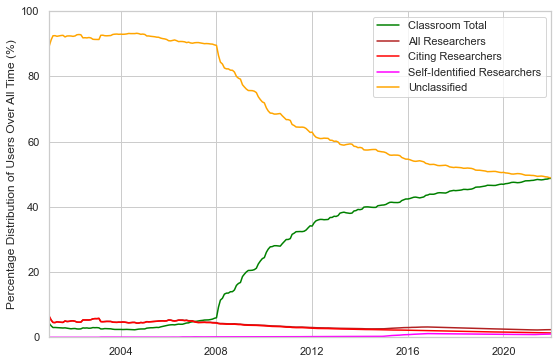

In [20]:
plt.figure(figsize=(9,6))
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.clustered_track_per, label='Classroom Total', \
             color='green');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.all_researchers_per, label='All Researchers', \
             color='firebrick');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.researcher_track_per, label='Citing Researchers', \
             color='red');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_identified_track_per, label='Self-Identified Researchers', \
             color='magenta');
plt.plot(user_breakdown_df2.year_month, user_breakdown_df2.self_track_per, label='Unclassified', \
             color='orange');

plt.ylim([0, 100])
plt.legend(loc='upper right');
plt.ylabel('Percentage Distribution of Users Over All Time (%)');
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_total_percent_copied.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_total_percent_copied.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_total_percent_copied.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_total_percent_copied.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_total_percent_copied.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_total_percent_copied.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

In [21]:
user_breakdown_df2.to_csv(pathsave+'nh_user_breakdown.csv')

In [22]:
clustered_date_track_df = pd.read_csv(pathsave+'clustered_all_date_track.csv')
#display(clustered_date_track_df)
print(clustered_date_track_df[100:115])

clipstart = 107
print(clustered_date_track_df['track'][clipstart:clipstart+1])
clustered_shift = clustered_date_track_df['track'][clipstart]
print('clustered_track_norm = ',clustered_shift)
clustered_shift = clustered_track[clipstart]
clustered_shift = clustered_track_df['track'][clipstart]
print('clustered_track_norm direct = ',clustered_shift)

clustered_clip = clustered_track - clustered_shift
clustered_clip[0:clipstart] = 0
#print(clustered_clip[80:120])

clustered_m_shift =                    clustered_m_track_df['track'][clipstart]
clustered_m_clip =                     clustered_m_track -               clustered_m_shift
clustered_m_clip[0:clipstart] = 0

clustered_x_shift =                    clustered_x_track_df['track'][clipstart]
clustered_x_clip =                     clustered_x_track -               clustered_x_shift
clustered_x_clip[0:clipstart] = 0

clustered_mx_shift =                    clustered_mx_track_df['track'][clipstart]
clustered_mx_clip =                     clustered_mx_track -               clustered_mx_shift
clustered_mx_clip[0:clipstart] = 0

simtotal_shift =                    simtotal_track_df['track'][clipstart]
simtotal_clip =                     simtotal_track -               simtotal_shift
simtotal_clip[0:clipstart] = 0

self_identified_shift =                    self_identified_track_df['track'][clipstart]
self_identified_clip =                     self_identified_track -               self_identified_shift
self_identified_clip[0:clipstart] = 0

researcher_shift =                    researcher_track_df['track'][clipstart]
researcher_clip =                     researcher_track -               researcher_shift
researcher_clip[0:clipstart] = 0

simtotal_shift =                    simtotal_track_df['track'][clipstart]
simtotal_clip =                     simtotal_track -               simtotal_shift
simtotal_clip[0:clipstart] = 0

self2_shift =                    self2_track_df['track'][clipstart]
self2_clip =                     self2_track -               self2_shift
self2_clip[0:clipstart] = 0

     Unnamed: 0          date  track
100         100  '2008-05-01'   2070
101         101  '2008-06-01'   2160
102         102  '2008-07-01'   2206
103         103  '2008-08-01'   2322
104         104  '2008-09-01'   2364
105         105  '2008-10-01'   2516
106         106  '2008-11-01'   2868
107         107  '2008-12-01'   3048
108         108  '2009-01-01'   3160
109         109  '2009-02-01'   3634
110         110  '2009-03-01'   3879
111         111  '2009-04-01'   4140
112         112  '2009-05-01'   4326
113         113  '2009-06-01'   4390
114         114  '2009-07-01'   4460
107    3048
Name: track, dtype: int64
clustered_track_norm =  3048
clustered_track_norm direct =  3048


TypeError: unsupported operand type(s) for -: 'list' and 'str'

In [ ]:
user_clip_df = pd.DataFrame()
user_clip_df['year_month'] = all_months_list
user_clip_df['simtotal_clip'] = simtotal_clip
user_clip_df['clustered_clip'] = clustered_clip
user_clip_df['clustered_m_clip'] = clustered_m_clip
user_clip_df['clustered_x_clip'] = clustered_x_clip
user_clip_df['clustered_mx_clip'] = clustered_mx_clip
user_clip_df['self_identified_clip'] = self_identified_clip
user_clip_df['self_clip'] = self2_clip
user_clip_df['researcher_clip'] = researcher_clip
display(user_clip_df.tail(5))

In [ ]:
end_date = datetime.datetime(2022,1,1)
start_date = datetime.datetime(2009,1,1)

plt.figure(figsize=(9,6))

plt.stackplot(user_clip_df.year_month, \
#               user_breakdown_df2[['clustered_track','self_track']].to_numpy().T, \
#              labels=['Classroom', 'Unclassified'], \
#              colors=['green', 'orange']); #Self-study              
              user_clip_df[['clustered_x_clip', 'clustered_mx_clip', 'clustered_m_clip', 'researcher_clip','self_identified_clip','self_clip']].to_numpy().T, \
             labels=['Classroom X','Classroom MX','Classroom M','Citing Researchers', 'Self-Identified Researcher','Unclassified'], \
             colors=['lawngreen','green', 'yellowgreen','red', 'fuchsia','orange']); #Self-study

plt.legend(loc='upper left')#,fontsize=14);
plt.ylabel('Total Simulation Users Over All Time')#,fontsize=15)
plt.xlim([start_date, end_date])#,fontsize=15)
plt.locator_params(axis="x", nbins=40)
#plt.xticks( rotation=45, ha='right')
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_total_clip_GK.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_total_clip_GK.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_total_clip_12months_GK.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_total_clip_GK.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_total_clip_GK.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_total_clip_GK.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')

In [ ]:
total = user_clip_df['clustered_clip'].to_numpy()+\
        user_clip_df['self_clip'].to_numpy() +\
        user_clip_df['researcher_clip'].to_numpy()+\
        user_clip_df['self_identified_clip'].to_numpy() + 0.001

#print('total ',total)

total_research = user_clip_df['researcher_clip'].to_numpy()+\
                 user_clip_df['self_identified_clip'].to_numpy() + 0.001

#print('total_research ',total_research)
user_clip_df['all_researchers'] = np.add(user_clip_df['self_identified_clip'], user_clip_df['researcher_clip'])
#user_breakdown_df2['all_researchers'] = user_breakdown_df2[['researcher_track','self_identified_track']].sum
display(user_clip_df['all_researchers'].tolist()[200:205])
display(user_clip_df['researcher_clip'].tolist()[200:205])
display(user_clip_df['self_identified_clip'].tolist()[200:205])

user_clip_df['clustered_clip_per'] = 100*np.divide(user_clip_df['clustered_clip'],total)
user_clip_df['self_identified_clip_per'] = 100*np.divide(user_clip_df['self_identified_clip'], total)
user_clip_df['researcher_clip_per'] = 100*np.divide(user_clip_df['researcher_clip'], total)
user_clip_df['self_clip_per'] = 100*np.divide(user_clip_df['self_clip'], total)
user_clip_df['all_researchers_per'] = 100*np.divide(user_clip_df['all_researchers'], total)



In [ ]:
plt.figure(figsize=(9,6))
plt.plot(user_clip_df.year_month, user_clip_df.clustered_clip_per, label='Classroom Total', \
             color='green');
plt.plot(user_clip_df.year_month, user_clip_df.all_researchers_per, label='All Researchers', \
             color='firebrick');
plt.plot(user_clip_df.year_month, user_clip_df.researcher_clip_per, label='Citing Researchers', \
             color='red');
plt.plot(user_clip_df.year_month, user_clip_df.self_identified_clip_per, label='Self-Identified Researchers', \
             color='magenta');
plt.plot(user_clip_df.year_month, user_clip_df.self_clip_per, label='Unclassified', \
             color='orange');

plt.ylim([0, 100])
plt.legend(loc='upper right');
plt.ylabel('Percentage Distribution of Users Over All Time (%)');
plt.xlim([start_date, end_date])
# plt.show()

if dev_flag == 'True':
    plt.savefig(cwd+'/plots_local/300_simusers_total_clip_percent_copied.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_total_clip_percent_copied.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_local/300_simusers_total_clip_percent_copied.png', dpi=300, bbox_inches='tight')
elif prod_flag == 'True':
    plt.savefig(cwd+'/plots_production/300_simusers_total_clip_percent_copied.eps', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_total_clip_percent_copied.pdf', dpi=300, bbox_inches='tight')
    plt.savefig(cwd+'/plots_production/300_simusers_total_clip_percent_copied.png', dpi=300, bbox_inches='tight')
else:
    print('no printing flag is active')